In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Importing auxiliary libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy.stats
from scipy import spatial
from scipy import optimize
from scipy import special

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Importing the data from CSV-files and setting extent and resolution
geo_data = gp.create_data([0,2000,0,2000,0,2000],[100,100,100],
                          path_o = "C:/Users/Jan/gempy/notebooks/input_data/tut_chapter1/simple_fault_model_orientations.csv", # importing orientation (foliation) data
                          path_i = "C:/Users/Jan/gempy/notebooks/input_data/tut_chapter1/simple_fault_model_points.csv") # importing point-positional interface data

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"Fault_Series":'Main_Fault',
                      "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['Main_Fault',
                                         'Sandstone_2','Siltstone', 'Shale', 'Sandstone_1',
                                         ], verbose=0)

# unconformity model:
#gp.set_series(geo_data, {"Fault_Series":'Main_Fault', "Unconf_Series":'Carbonate',
#                      "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1')},
#                       order_series = ["Fault_Series", "Unconf_Series", 'Strat_Series'],
#                       order_formations=['Main_Fault', 'Carbonate',
#                                         'Sandstone_2','Siltstone', 'Shale', 'Sandstone_1',
#                                         ], verbose=0)

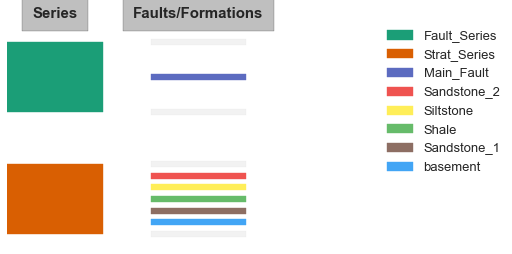

In [4]:
%matplotlib inline
gp.get_sequential_pile(geo_data)

In [5]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1,1], output='geology', compile_theano=True, theano_optimizer='fast_compile')
#print(interp_data)

Compiling theano function...


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [6]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [7]:
colormodel = {'basement':'#808080','Sandstone_1':'#ffa700','Shale':'#d62d20','Siltstone':'#0057e7', 
              'Sandstone_2':'#008744','Main_Fault':'#000000'}

geo_data.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data.formations['color'])[1:])
geo_data.formations

,value,formation_number,color
Main_Fault,1,1,#000000
Sandstone_2,2,2,#008744
Siltstone,3,3,#0057e7
Shale,4,4,#d62d20
Sandstone_1,5,5,#ffa700
basement,6,6,#808080


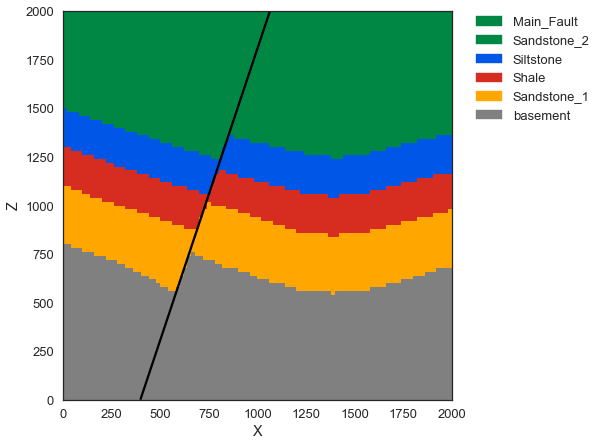

In [8]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=50,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data, interp_data, cell_number=50,
                         direction='y', fb=fault_block)

plt.savefig(fname='Gempy_cross_section', edgecolor='black', bbox_inches='tight')

../../..\gempy\gempy_front.py:977: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


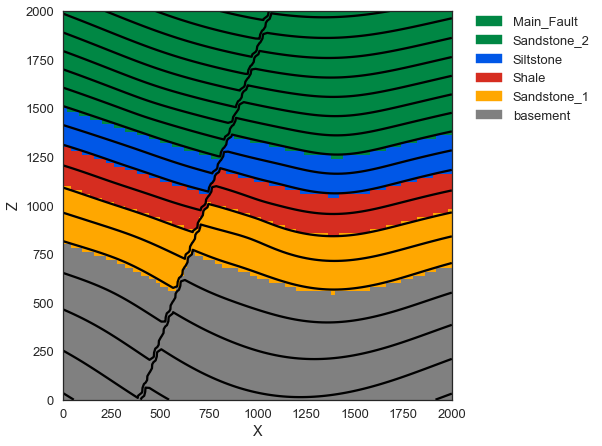

In [9]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=50,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

#gp.plotting.extract_countours(geo_data, interp_data, cell_number=50,
                         #direction='y', fb=fault_block)

gp.plot_scalar_field(geo_data, lith_block[1], cell_number=50, N=20,
                        direction='y', plot_data=False, colors='k', cmap=None)

plt.savefig(fname='Gempy_scalar_field2', edgecolor='black', bbox_inches='tight')

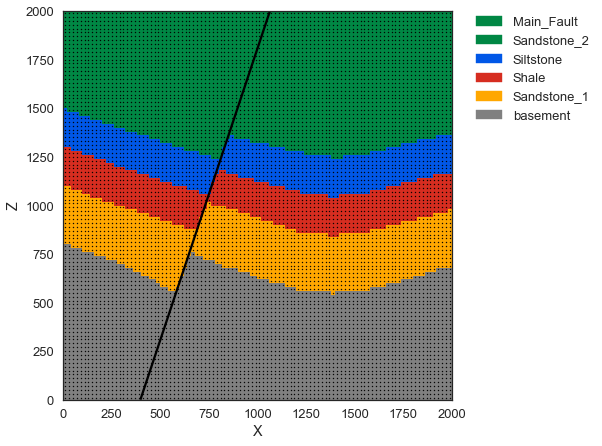

In [10]:
%matplotlib inline


gp.plotting.plot_section(geo_data, lith_block[0], cell_number=50,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data, interp_data, cell_number=50,
                         direction='y', fb=fault_block)

plt.scatter(geo_data.grid.values[:,0][np.where((geo_data.grid.values[:,1]<20))],
            geo_data.grid.values[:,2][np.where((geo_data.grid.values[:,1]<20))], s=1, c='black', zorder=2)

plt.savefig(fname='Gempy_Grid', edgecolor='black', bbox_inches='tight')

In [11]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith_block[1],
                               fault_block[1],
                               original_scale=True)

In [12]:
print(ver_s[0][:,0])

[ 400.          393.33595276  400.         ... 1053.33595276 1046.66664124
 1053.33595276]


In [13]:
print(geo_data.grid.values[:,0])

[  10.   10.   10. ... 1990. 1990. 1990.]


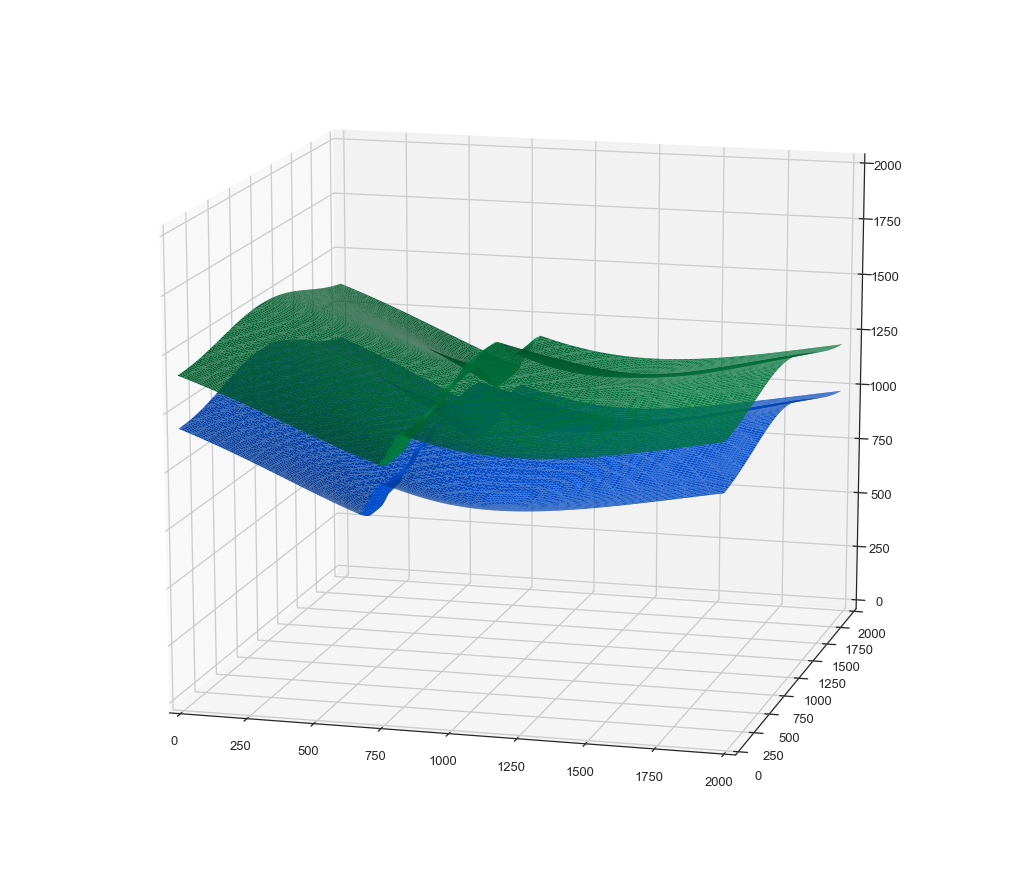

In [24]:
fig = plt.figure(figsize=(14, 12))
ax = Axes3D(fig)

a = ax.plot_trisurf(ver_s[1][:,0],ver_s[1][:,1], ver_s[1][:,2], triangles=sim_s[1], color='#008744')
a = ax.plot_trisurf(ver_s[2][:,0],ver_s[2][:,1], ver_s[2][:,2], triangles=sim_s[2], color='#0057e7')
#a = ax.plot_trisurf(ver_s[3][:,0],ver_s[3][:,1], ver_s[3][:,2], triangles=sim_s[3], color='#d62d20')
#a = ax.plot_trisurf(ver_s[4][:,0],ver_s[4][:,1], ver_s[4][:,2], triangles=sim_s[4], color='#ffa700')
#a = ax.plot_trisurf(ver_s[0][:,0],ver_s[0][:,1], ver_s[0][:,2], triangles=sim_s[0], color='black')

ax.view_init(15, -75)
ax.axes.set_zlim3d(0,2000)
ax.axes.set_xlim3d(0,2000)
ax.axes.set_ylim3d(0,2000)
#a = ax.scatter3D(xs=test.result_coord[0],ys=test.result_coord[1],zs=test.result_coord[2], c=test.kriging_result[1], s=20, marker=',', cmap='viridis', alpha=1)


#{'basement':'#808080','Sandstone_1':'#ffa700','Shale':'#d62d20','Siltstone':'#0057e7', 'Sandstone_2':'#008744','Main_Fault':'#000000'}


#b = ax.scatter(geo_data.grid.values[:,0], geo_data.grid.values[:,1], geo_data.grid.values[:,2], s=2, c='black')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

ax.view_init(15, -75)
#fig.colorbar(a, orientation='horizontal')

plt.savefig(fname='3D_GemPy_model', edgecolor='black', bbox_inches='tight')

In [15]:
print(geo_data.grid.values)

print

[[  10.   10.   10.]
 [  10.   10.   30.]
 [  10.   10.   50.]
 ...
 [1990. 1990. 1950.]
 [1990. 1990. 1970.]
 [1990. 1990. 1990.]]


<function print>

In [16]:
d = {'X': geo_data.grid.values[:, 0], 'Y': geo_data.grid.values[:, 1], 'Z': geo_data.grid.values[:, 2],
     'lithology': lith_block[0], 'scalar field value': lith_block[1], 'fault block': fault_block[0]}
dataframe = pd.DataFrame(data=d)
print(dataframe.head())

      X     Y     Z  lithology  scalar field value  fault block
0  10.0  10.0  10.0        6.0           30.347836          1.0
1  10.0  10.0  30.0        6.0           30.352757          1.0
2  10.0  10.0  50.0        6.0           30.357658          1.0
3  10.0  10.0  70.0        6.0           30.362553          1.0
4  10.0  10.0  90.0        6.0           30.367435          1.0
